In [10]:
from sklearn.datasets import load_iris
import pandas as pd

In [15]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [21]:
df.drop('target', axis=1, inplace=True)

In [22]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
df1 = df[['sepal length (cm)', 'petal length (cm)', 'species']]
df1.head()

,sepal length (cm),petal length (cm),species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [24]:
df1['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [28]:
x = df1.drop('species', axis=1)
y = df1['species']

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [45]:
y_train.shape

(120,)

In [46]:
x_test.shape

(30, 2)

In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [48]:
lr.fit(x_train.values,y_train)

LogisticRegression()

In [52]:
pred = lr.predict(x_test.values)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(pred,y_test)

1.0

In [55]:
confusion_matrix(pred,y_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

### Calculating probabilities for a query

In [60]:
import numpy as np 
query = np.array([[3.2,2.9]])
lr.predict_proba(query)

array([[0.74728077, 0.25079214, 0.0019271 ]])

In [61]:
lr.predict(query)

array([0])

<AxesSubplot:>

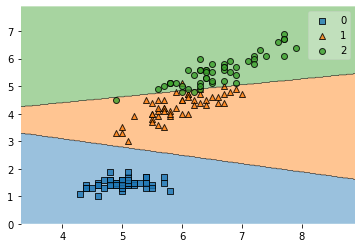

In [63]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.values, y.values,lr)